# ESSAY SCORES IN NATIONAL EXAM (BRAZIL) - EDA

## INTRODUCTION


>> The National High School Exam (Enem in portuguese) was instituted in 1998, with the objective of evaluating students' academic performance at the end of basic education. The exam improved its methodology and, in 2009, it started to be used as a mechanism of access to higher education, through the Unified Selection System (Sisu in portuguese), the University for All Program (ProUni in portuguese) and agreements with Portuguese institutions. The Enem participants can also apply for student financing in government programs, such as the Student Financing Fund (Fies in portuguese). The results of Enem continue to enable the development of studies and educational indicators. 

This project aims to analyze the performance of the participants in the essay, taking into account some of their characteristics. In this way, we intend to observe the relationship between the score of essay and some variables that represent characteristics of the participants.<br>
<br>

* THE VARIABLES:<br>

  **NU_NOTA_REDACAO:** Essay Score. <br>
  **NU_IDADE:** Age. <br>
  **TP_SEXO:** Sex. <br>
  **TP_COR_RACA:** Race. <br>
  **Q001:** Education Level of Responsible Man. <br>
  **Q002:** Education Level of Responsible Woman. <br>
  **Q006:** Familiar Income. <br>

A more complete description of the variables will be presented in the development of the project.

* QUESTIONS: <br>
 <br>
1) What is the relationship between essay score and age? <br>
2) What is the relationship between the score of the essay and the race of the participant? <br> 
3) Is there a distinction between the average score of male and female participants? <br> 
4) What is the relationship between the level of education of those responsible and the essay score? <br> 
5) And how family income impacts the performance of participants. <br> 


Enem information can be found here: https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem <br>
Dataset: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem


## 1. IMPORTING AND PREPARING THE DATA

In [1]:
# Import Libraries
library(tidyverse)
library(data.table)
library(gridExtra)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'data.table' was built under R version 3.6.3"
Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is mas

In [2]:
# Read the data
df_enem<- fread("enem2019.csv")

In [3]:
# Check for missing values
f=function(x){any(is.na(x))}
check.na=apply(df_enem,2,f);
check.na

NU_IDADE         TP_SEXO     TP_COR_RACA NU_NOTA_REDACAO            Q001 
          FALSE           FALSE           FALSE            TRUE           FALSE 
           Q002            Q006 
          FALSE           FALSE

In [4]:
# Summary of data
summary(df_enem)

    NU_IDADE       TP_SEXO           TP_COR_RACA    NU_NOTA_REDACAO  
 Min.   : 1.00   Length:5095270     Min.   :0.000   Min.   :   0.0   
 1st Qu.:18.00   Class :character   1st Qu.:1.000   1st Qu.: 480.0   
 Median :19.00   Mode  :character   Median :2.000   Median : 580.0   
 Mean   :22.09                      Mean   :2.128   Mean   : 571.2   
 3rd Qu.:24.00                      3rd Qu.:3.000   3rd Qu.: 680.0   
 Max.   :94.00                      Max.   :5.000   Max.   :1000.0   
                                                    NA's   :1172126  
     Q001               Q002               Q006          
 Length:5095270     Length:5095270     Length:5095270    
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                                  

In [5]:
# View first six lines of dataset
head(df_enem)

NU_IDADE,TP_SEXO,TP_COR_RACA,NU_NOTA_REDACAO,Q001,Q002,Q006
21,M,3,780,D,E,B
16,F,3,600,D,E,B
18,F,1,640,H,E,C
23,M,3,NA,D,D,C
23,M,3,NA,B,C,C
31,M,1,580,C,C,C


In [6]:
# Viewm last six lines of dataset
tail(df_enem)

NU_IDADE,TP_SEXO,TP_COR_RACA,NU_NOTA_REDACAO,Q001,Q002,Q006
30,F,2,NA,B,D,B
28,F,2,NA,H,F,C
25,M,2,NA,B,B,A
18,F,3,NA,A,A,A
16,M,1,800,G,G,I
25,F,2,280,B,D,B


In [7]:
# Transform the variables
df_enem$TP_SEXO<- factor(df_enem$TP_SEXO,
                         levels=c("M","F"),labels=c("Male","Female"))
df_enem$TP_COR_RACA<- factor(df_enem$TP_COR_RACA,
                             levels=c(0,1,2,3,4,5),
                             labels=c("Not declared","White","Black","Brown","Yellow","Indigenous"))
df_enem$SG_UF_PROVA<- factor(df_enem$SG_UF_PROVA)
df_enem<- df_enem %>%
  filter(NU_IDADE>14)
df_enem$CAT_IDADE<- cut(df_enem$NU_IDADE,breaks = c(15,20,25,30,40,50,60,70,80,90,100), right = F)
order_race<- table(df_enem$TP_COR_RACA)
order_man<- table(df_enem$Q001)
order_woman<-table(df_enem$Q002)

In [8]:
# Glimpse the data
glimpse(df_enem)

Rows: 5,089,607
Columns: 10
$ NU_IDADE        <int> 21, 16, 18, 23, 23, 31, 30, 26, 19, 17, 21, 24, 22, 31~
$ TP_SEXO         <fct> Male, Female, Female, Male, Male, Male, Female, Female~
$ TP_COR_RACA     <fct> Brown, Brown, White, Brown, Brown, White, Brown, Brown~
$ NU_NOTA_REDACAO <int> 780, 600, 640, NA, NA, 580, 360, 480, 460, 540, 900, N~
$ Q001            <chr> "D", "D", "H", "D", "B", "C", "B", "B", "D", "E", "E",~
$ Q002            <chr> "E", "E", "E", "D", "C", "C", "B", "B", "D", "E", "C",~
$ Q006            <chr> "B", "B", "C", "C", "C", "C", "C", "B", "B", "B", "B",~
$ SG_UF_PROVA     <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA~
$ CAT_IDADE       <fct> "[20,25)", "[15,20)", "[15,20)", "[20,25)", "[20,25)",~
$ IN_GESTANTE     <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA~


In [9]:
# Descriptive statistics
df_enem %>%
summarize(Age_mean=mean(NU_IDADE),Age_sd=sd(NU_IDADE),Age_min=min(NU_IDADE),Age_max=max(NU_IDADE),
          Essay_mean=mean(NU_NOTA_REDACAO,na.rm=T),Essay_sd=sd(NU_NOTA_REDACAO,na.rm=T),
          Essay_min=min(NU_NOTA_REDACAO,na.rm=T),Essay_max=max(NU_NOTA_REDACAO,na.rm=T)) 

Age_mean,Age_sd,Age_min,Age_max,Essay_mean,Essay_sd,Essay_min,Essay_max
22.09661,7.453967,15,94,571.2075,188.7614,0,1000


### DICTIONARY OF VARIABLES

**NU_NOTA_REDACAO:** Essay Score (from 0 to 1000). <br>
**NU_IDADE:** Age. <br>
**TP_SEXO:** Sex (Male or Female). <br>
**TP_COR_RACA:** Self-declared Race/Colour (Not declared, White, Black, Brown, Yellow, Indigenous). <br>

**Q001:** WHAT IS THE EDUCATION LEVEL OF YOUR FATHER/PERSON IN CHARGE? <br>

**Never Studied:** Never studied. <br>
**Elementary School A:** Incomplete 4th grade / 5th year of elementary school. <br>
**Elementary School B:** Completed 4th grade / 5th grade of elementary school, but incomplete 8th grade / 9th grade. <br>
**High School A:** Completed 8th grade / 9th grade of elementary school, but incomplete high school. <br>
**High School B:** Completed high school, but incomplete college degree. <br>
**College Degree:** Completed college, but incomplete postgraduation. <br>
**PostGraduate:** Completed postgraduate. <br>
**Not Know:** I do not know. <br>

**Q002:** WHAT IS THE EDUCATION LEVEL OF YOUR MOTHER/PERSON IN CHARGE? <br>

**Never Studied:** Never studied. <br>
**Elementary School A:** Incomplete 4th grade / 5th year of elementary school. <br>
**Elementary School B:** Completed 4th grade / 5th grade of elementary school, but incomplete 8th grade / 9th grade. <br>
**High School A:** Completed 8th grade / 9th grade of elementary school, but incomplete high school. <br>
**High School B:** Completed high school, but incomplete college degree. <br>
**College Degree:** Completed college, but incomplete postgraduation. <br>
**PostGraduate:** Completed postgraduate. <br>
**Not Know:** I do not know. <br>

**Q006:** WHAT IS YOUR MONTHLY HOUSEHOLD INCOME? (In BRL)<br>

**A:** No income. <br>
**B:** Up to 998.00. <br>
**C:** From 998.01 to 1,497.00. <br>
**D:** From 1,497.01 to 1,996.00. <br>
**E:** From 1,996.01 to 2,495.00. <br>
**F:** From 2,495.01 to 2,994.00. <br>
**G:** From 2,994.01 to 3,992.00. <br>
**H:** From 3,992.01 to 4,990.00. <br>
**I:** From 4,990.01 to 5,988.00. <br>
**J:** From 5,988.01 to 6,986.00. <br>
**K:** From 6,986.01 to 7,984.00. <br>
**L:** From 7,984.01 to 8,982.00. <br>
**M:** From 8,982.01 to 9,980.00. <br>
**N:** From 9,980.01 to 11,976.00. <br>
**O:** From 11,976.01 to 14,970.00. <br>
**P:** From 14,970.01 to 19,960.00. <br>
**Q:** More than 19,960.00. <br>



## 2. EXPLORATORY DATA ANALISYS

### 2.1 Variables

*First, we will undertake a univariate analysis, that is, we will examine one variable at a time. We will use histograms to visualize the distribution of numerical variables and bar graphs for categorical variables.*

Warning message:
"Removed 1171416 rows containing non-finite values (stat_bin)."

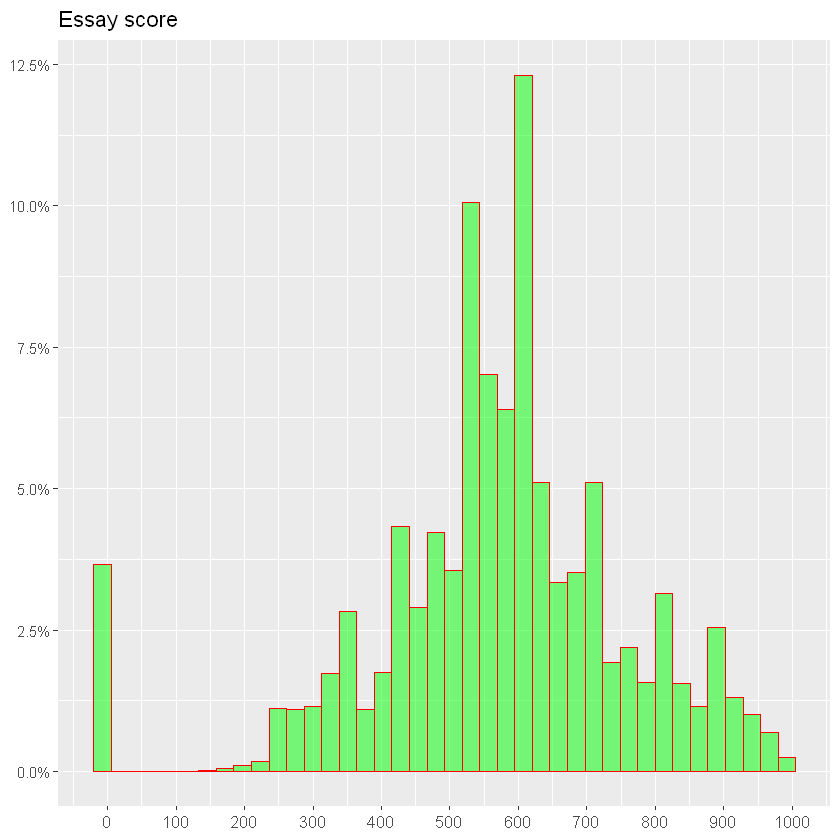

In [10]:
# Plot essay score histogram
df_enem %>%
ggplot(aes(NU_NOTA_REDACAO)) +
geom_histogram(aes(y = (..count..)/sum(..count..)),
               fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
labs(title = "Essay score", x=NULL, y=NULL) +
scale_x_continuous(breaks=seq(min(0),max(1000),by=100)) +
scale_y_continuous(labels=scales::percent) +
theme(axis.text.x = element_text(size = 10))

In [11]:
# Plot age histogram
graph1<-df_enem %>%
ggplot(aes(NU_IDADE)) +
geom_histogram(aes(y = (..count..)/sum(..count..)),
               fill = "green", color = "lightsalmon1", alpha = 0.5, bins = 40, boundary = 5) +
labs(title = "Age", x=NULL, y=NULL) +
scale_x_continuous(breaks=seq(min(df_enem$NU_IDADE),max(df_enem$NU_IDADE),by=5)) +
scale_y_continuous(labels=scales::percent) +
theme(axis.text.x = element_text(size = 10))

In [12]:
# Plot age bar
graph2<-df_enem %>%
ggplot(aes(x=CAT_IDADE,fill=CAT_IDADE)) +
geom_bar(aes(y = (..count..)/sum(..count..)),show.legend = F,alpha=.5) + 
scale_y_continuous(labels=scales::percent) +
labs(x = NULL, y= NULL, title = "Age (category)") +
theme(axis.text.x = element_text(size = 12))

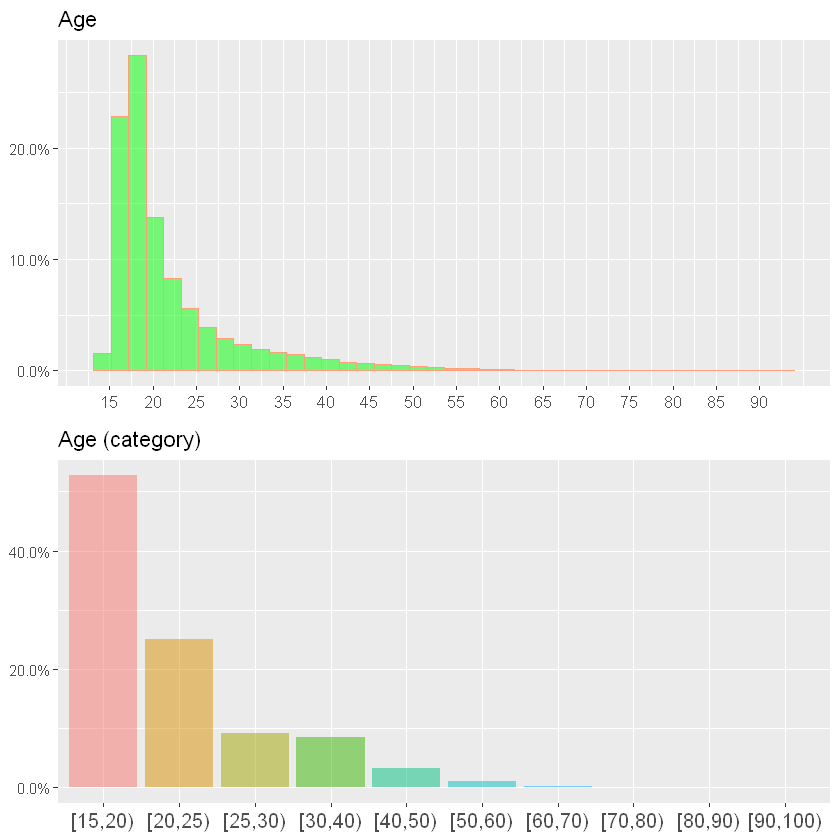

In [13]:
grid.arrange(graph1,graph2)

*We remove values less than 15 years of age.

In [14]:
# Plot sex bar
graph3<-df_enem %>%
ggplot(aes(TP_SEXO, fill=TP_SEXO)) +
geom_bar(aes(y = (..count..)/sum(..count..)),show.legend = F,alpha=.5) + 
scale_y_continuous(labels=scales::percent) +
labs(x = NULL, y= NULL, title = "Sex") +
theme(axis.text.x = element_text(size = 12))

In [15]:
# Plot race bar
graph4<-df_enem %>%
ggplot(aes(x=reorder(TP_COR_RACA,order_race[TP_COR_RACA]),fill=TP_COR_RACA)) +
geom_bar(aes(y = (..count..)/sum(..count..)),show.legend = F,alpha=.5) + 
scale_y_continuous(labels=scales::percent) +
labs(x = NULL, y= NULL, title = "Race") +
theme(axis.text.x = element_text(size = 12))


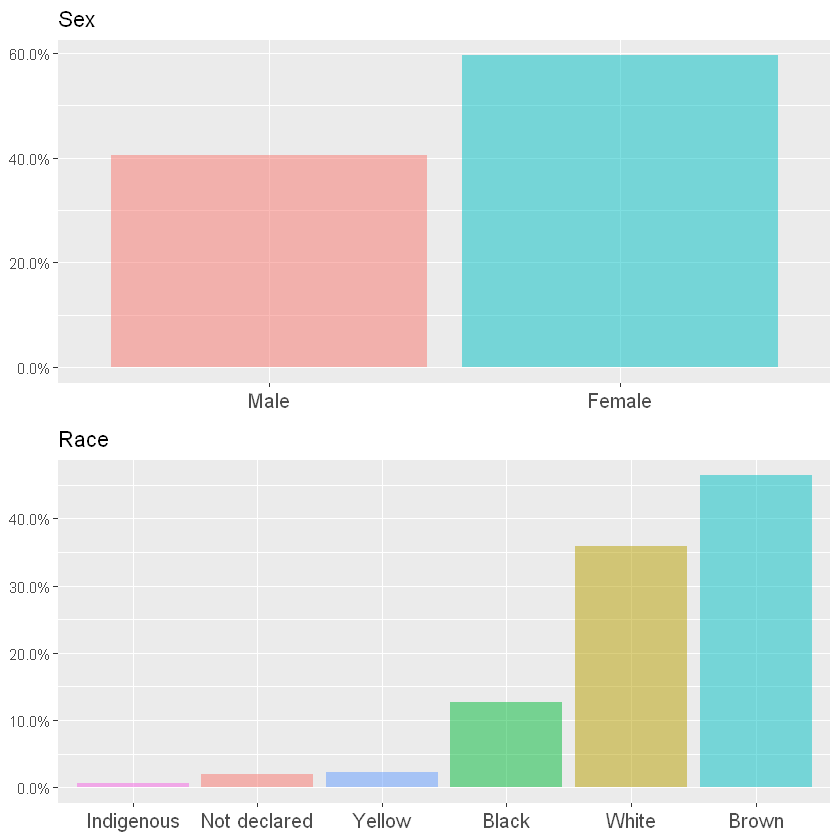

In [16]:
grid.arrange(graph3,graph4)

In [17]:
# Plot Education level of man/person in charge
graph5<-df_enem %>%
ggplot(aes(reorder(Q001,order_man[Q001]),fill=Q001)) +
geom_bar(aes(y = (..count..)/sum(..count..)),show.legend = F,alpha=.5) + 
scale_y_continuous(labels=scales::percent) +
labs(x = NULL, y= NULL, title = "Education level of man/person in charge") +
theme(axis.text.x = element_text(size = 12))

In [18]:
# Plot Education level of woman/person in charge
graph6<-df_enem %>%
ggplot(aes(reorder(Q002,order_woman[Q002]),fill=Q002)) +
geom_bar(aes(y = (..count..)/sum(..count..)),show.legend = F,alpha=.5) + 
scale_y_continuous(labels=scales::percent) +
labs(x = NULL, y= NULL, title = "Education level of mother/person in charge") +
theme(axis.text.x = element_text(size = 12))

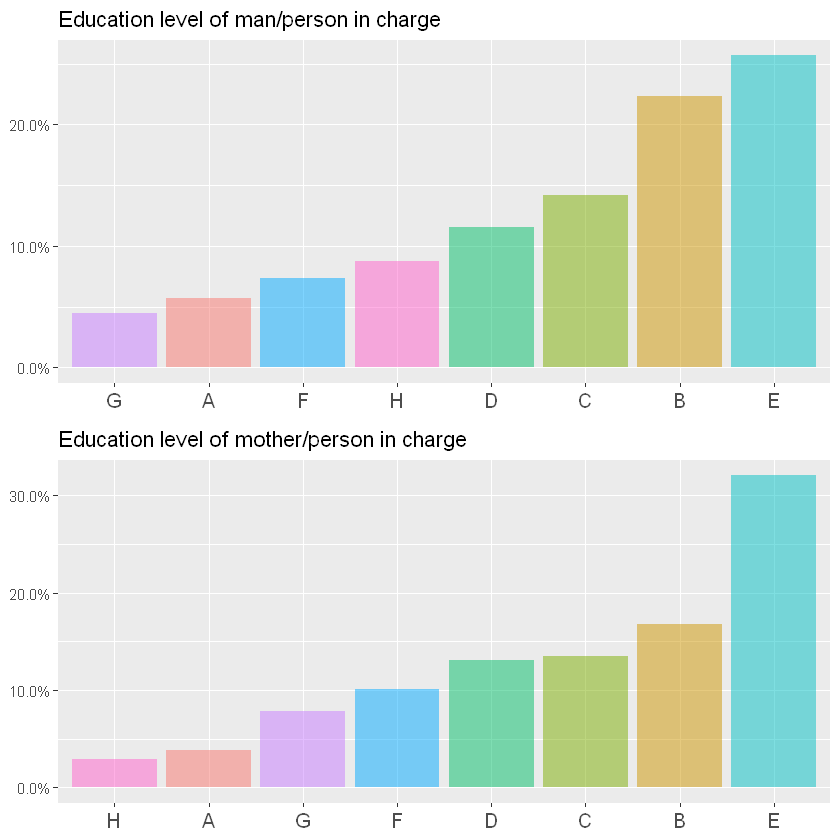

In [19]:
grid.arrange(graph5,graph6)

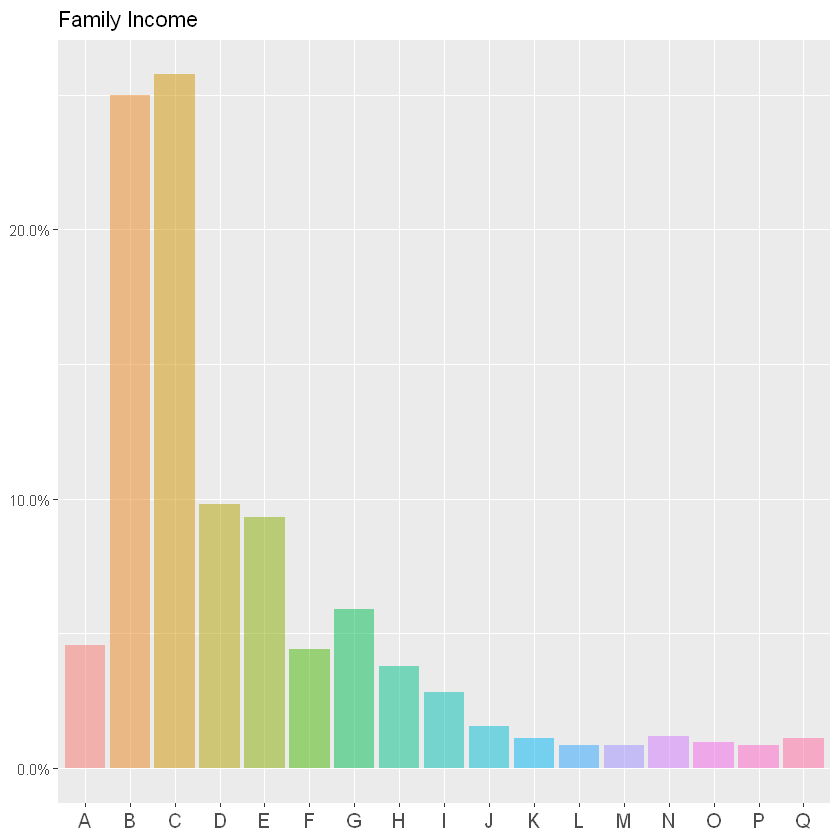

In [20]:
# Plot family income bar
df_enem %>%
ggplot(aes(Q006,fill=Q006)) +
geom_bar(aes(y = (..count..)/sum(..count..)),show.legend = F,alpha=.5) + 
scale_y_continuous(labels=scales::percent) +
labs(x = NULL, y= NULL, title = "Family Income") +
theme(axis.text.x = element_text(size = 12))

**CONSIDERATIONS**<br>
<br>
1. Approximately 3.5% of the participants scored zero in the essay. If we cut out the notes (200 to 1000), we notice that the data is close to a normal distribution. <br>
2. Most participants are between 15 and 20 years old (more than 50%). <br>
3. About 60% of the participants are female (There is no distinction between cis and trans). <br>
4. About half are self-declared brown. Self-declared blacks are only about 13%. <br>
5. Most of those responsible (men or women) have only completed high school. But we also note that a considerable number of male guardians have not completed elementary school. <br>
6. Most participants have a monthly household income of up to R\\$ 1,500.00.

### 2.2 Relation Two Variables

In [21]:
# Relation Essay Score x Age
graph7<-df_enem %>%
ggplot(aes(NU_NOTA_REDACAO,CAT_IDADE,fill=CAT_IDADE)) +
geom_boxplot(alpha=.5,outlier.colour="gray",show.legend = F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color=   "white", fill="green") +
  labs(title = "Essay Score per Age", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(size=12)) 

In [22]:
# Relation Essay Score x Sex
graph8<-df_enem %>%
  ggplot(aes(NU_NOTA_REDACAO, TP_SEXO, fill = TP_SEXO)) +
  geom_boxplot(outlier.colour = "grey", show.legend = F,alpha=.5) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Essay Score per Sex", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 12)) +
coord_flip()

Warning message:
"Removed 1171416 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_summary)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_summary)."

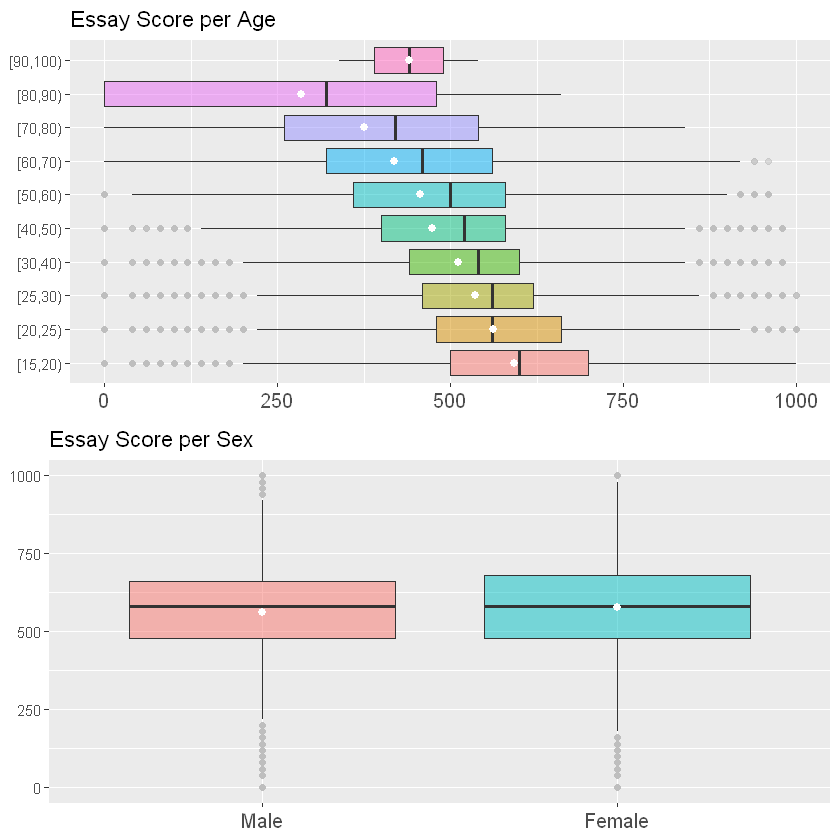

In [23]:
grid.arrange(graph7,graph8)

Warning message:
"Removed 1171416 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_summary)."

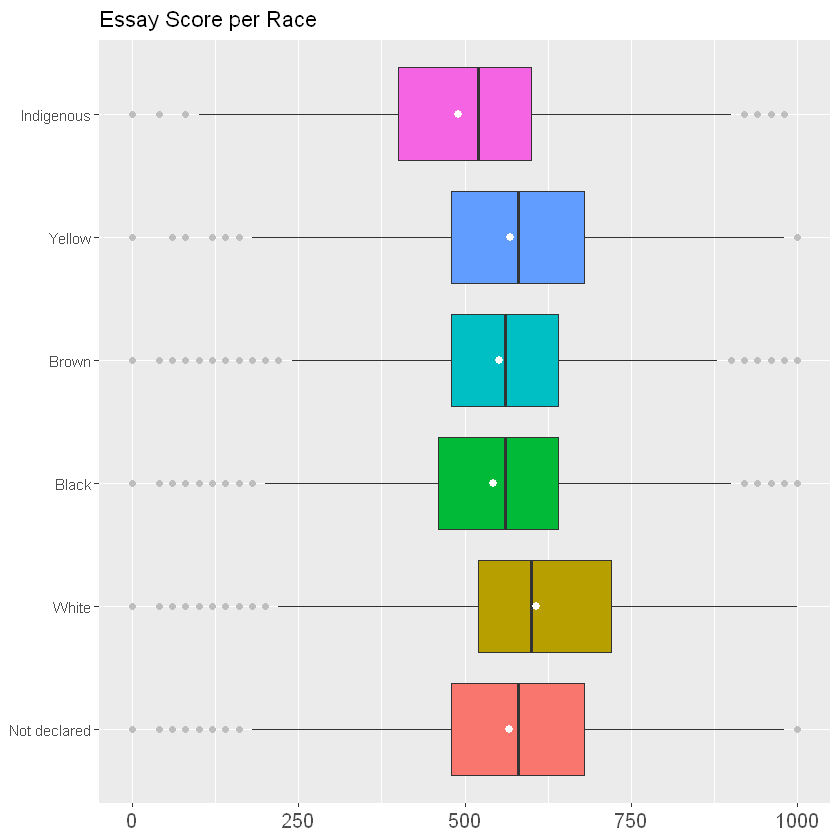

In [24]:
# Relation Essay Score x Race
df_enem %>%
  ggplot(aes(NU_NOTA_REDACAO, TP_COR_RACA, fill = TP_COR_RACA)) +
  geom_boxplot(outlier.colour = "grey", show.legend = F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Essay Score per Race", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 12))

In [25]:
# Relation Essay Score x Education level of man/person in charge
graph9<-df_enem %>%
  ggplot(aes(NU_NOTA_REDACAO, Q001, fill = Q001)) +
  geom_boxplot(outlier.colour = "grey", show.legend = F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Essay Score per Education of man/person in charge", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 12)) +
coord_flip()

In [26]:
# Relation Essay Score x Education level of woman/person in charge
graph10<-df_enem %>%
  ggplot(aes(NU_NOTA_REDACAO, Q002, fill = Q002)) +
  geom_boxplot(outlier.colour = "grey", show.legend = F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Essay Score per Education of woman/person in charge", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 12)) +
coord_flip()

Warning message:
"Removed 1171416 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_summary)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_summary)."

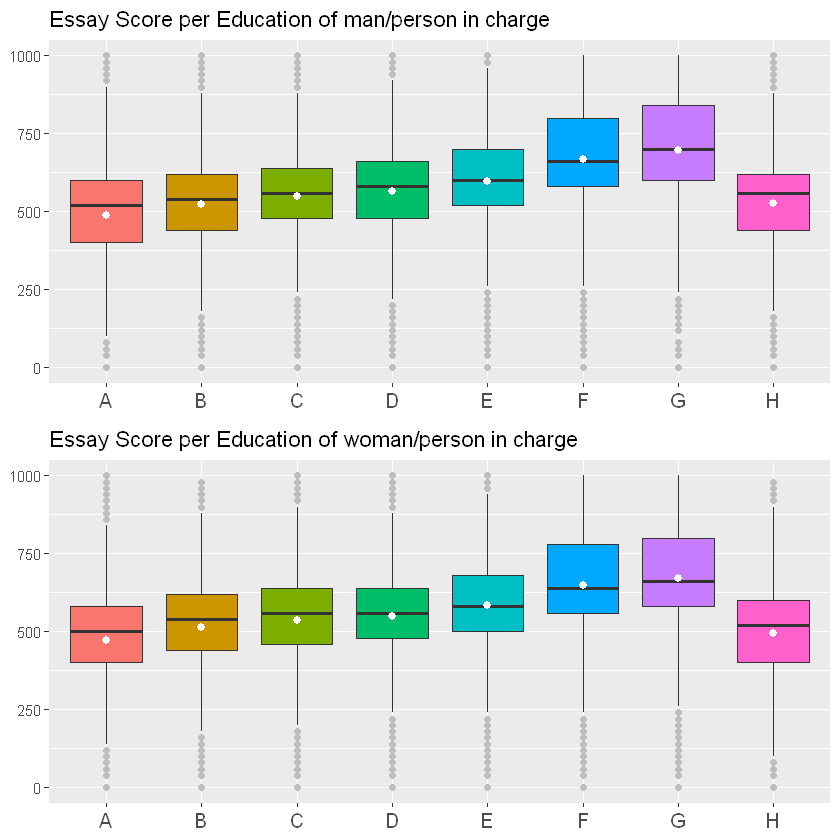

In [27]:
grid.arrange(graph9,graph10)

Warning message:
"Removed 1171416 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_summary)."

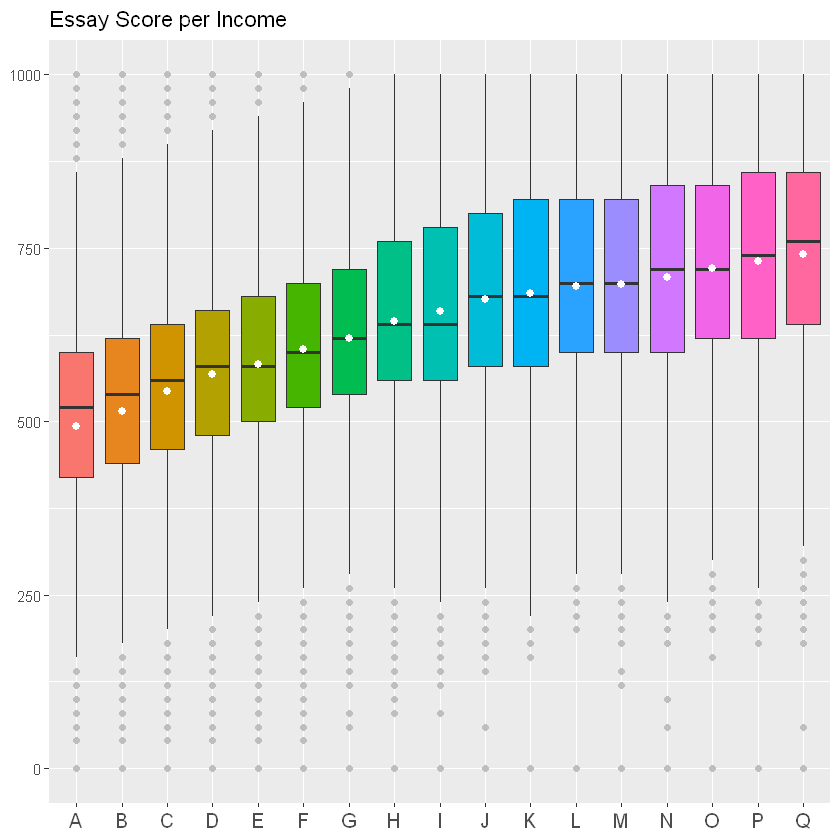

In [28]:
# Relation Essay Score x Income
df_enem %>%
  ggplot(aes(NU_NOTA_REDACAO, Q006, fill = Q006)) +
  geom_boxplot(outlier.colour = "grey", show.legend = F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Essay Score per Income", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 12)) +
coord_flip()

### 2.3 Relation Three Variables

Warning message:
"Removed 1171416 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_summary)."

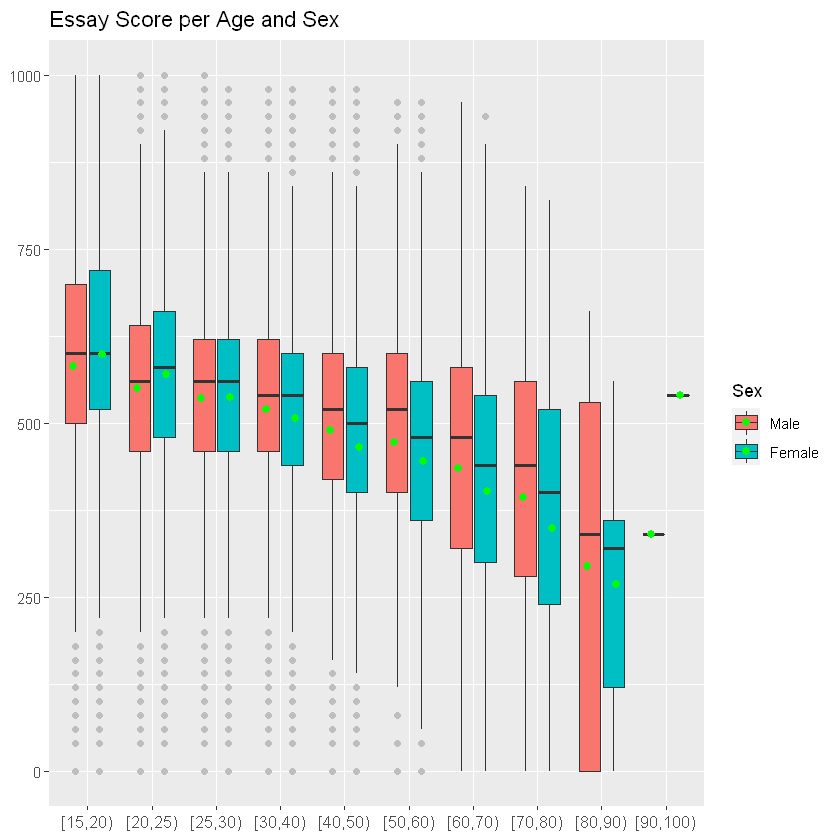

In [29]:
# Relation Essay Score, Age and Sex
df_enem %>%
ggplot(aes(NU_NOTA_REDACAO, CAT_IDADE, fill = TP_SEXO)) +
geom_boxplot(outlier.colour = "grey") +
stat_summary(fun=mean, geom="point", aes(group=TP_SEXO),
             position=position_dodge(.9),
             color="green", size=2) +
labs(title = "Essay Score per Age and Sex", x=NULL, y=NULL,fill="Sex") +
theme(axis.text.x = element_text(size = 10)) +
coord_flip()

Warning message:
"Removed 1171416 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_summary)."

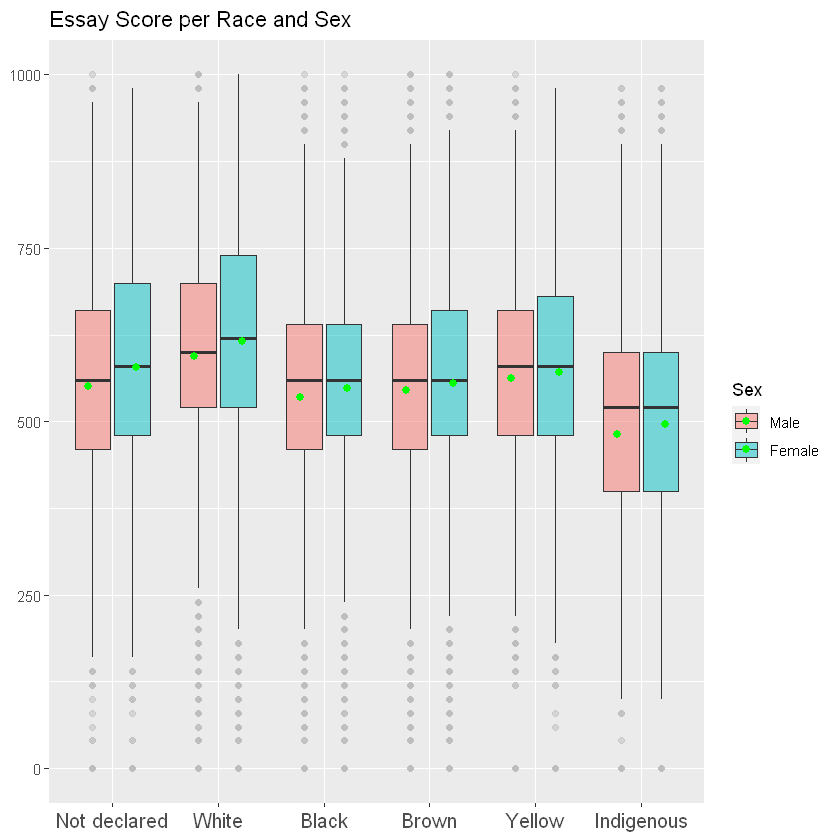

In [30]:
# Relation Essay Score, Race and Sex
df_enem %>%
  ggplot(aes(NU_NOTA_REDACAO, TP_COR_RACA, fill = TP_SEXO)) +
  geom_boxplot(outlier.colour = "grey",alpha=.5) +
stat_summary(fun=mean, geom="point", aes(group=TP_SEXO),
             position=position_dodge(.9),
             color="green", size=2) +
  labs(title = "Essay Score per Race and Sex", x=NULL, y=NULL,fill="Sex") +
theme(axis.text.x = element_text(size = 12)) +
coord_flip()

Warning message:
"Removed 1171416 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_summary)."

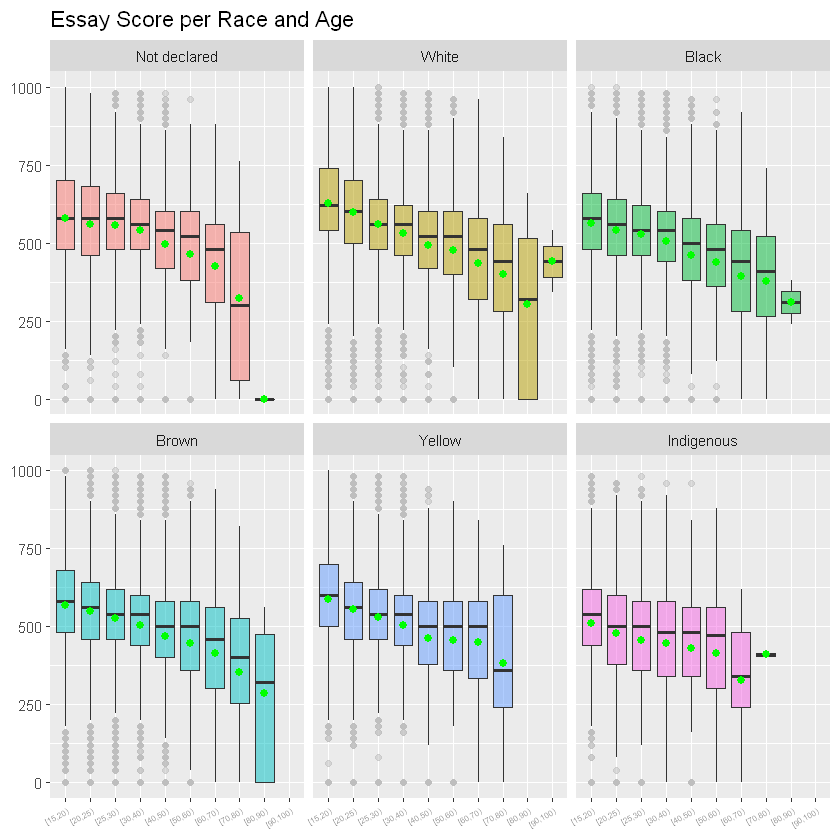

In [31]:
# Relation Essay Score, Race and Age
df_enem %>%
  ggplot(aes(NU_NOTA_REDACAO,CAT_IDADE,fill=TP_COR_RACA)) +
  geom_boxplot(outlier.colour = "grey",alpha=.5,show.legend=F) +
stat_summary(fun=mean, geom="point", aes(group=TP_COR_RACA),
             position=position_dodge(.9),
             color="green", size=2,show.legend=F) +
  labs(title = "Essay Score per Race and Age", x=NULL, y=NULL) +
theme(axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1,size = 5)) +
facet_wrap(~TP_COR_RACA) +
coord_flip()

In [32]:
# Relation Essay Score, Education of man/person in charge and Sex
graph11<-df_enem %>%
  ggplot(aes(NU_NOTA_REDACAO, Q001, fill = TP_SEXO)) +
  geom_violin(alpha=.5) +
stat_summary(fun=mean, geom="point", aes(group=TP_SEXO),
             position=position_dodge(.9),
             color="green", size=2,show.legend=F) +
  labs(title = "Essay Score per Education(man) and Sex", x=NULL, y=NULL,fill="Sex") +
theme(axis.text.x = element_text(size = 12)) +
coord_flip()

In [33]:
# Relation Essay Score, Education of woman/person in charge and Sex
graph12<-df_enem %>%
  ggplot(aes(NU_NOTA_REDACAO, Q002, fill = TP_SEXO)) +
  geom_violin(alpha=.5) +
stat_summary(fun=mean, geom="point", aes(group=TP_SEXO),
             position=position_dodge(.9),
             color="green", size=2,show.legend=F) +
  labs(title = "Essay Score per Education(woman) and Sex", x=NULL, y=NULL,fill="Sex") +
theme(axis.text.x = element_text(size = 12)) +
coord_flip()

Warning message:
"Removed 1171416 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_summary)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_summary)."

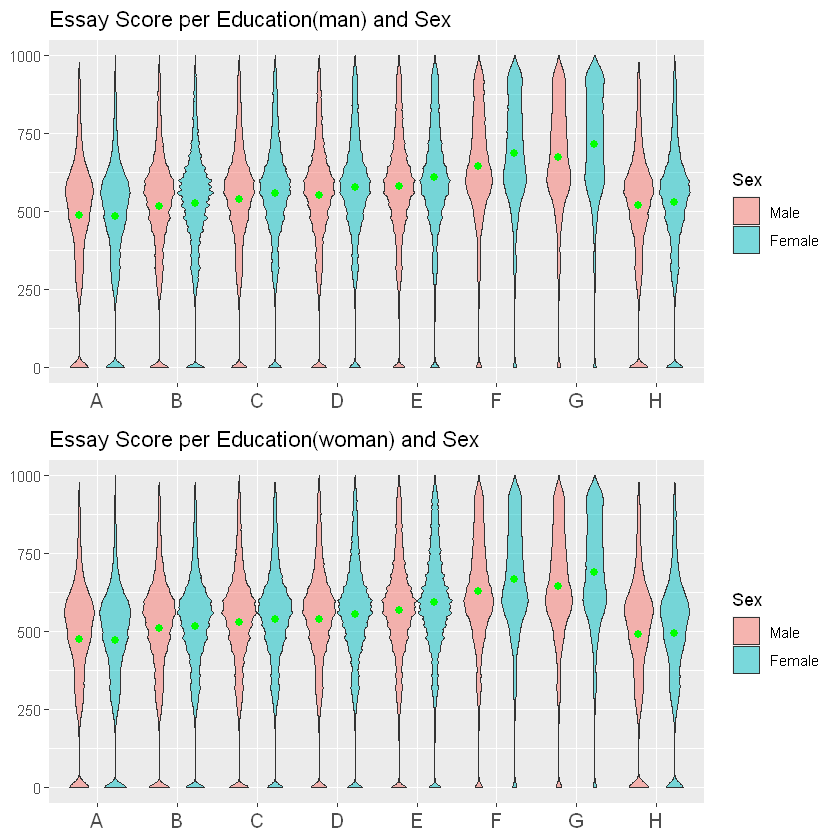

In [34]:
grid.arrange(graph11,graph12)

Warning message:
"Removed 1171416 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_summary)."

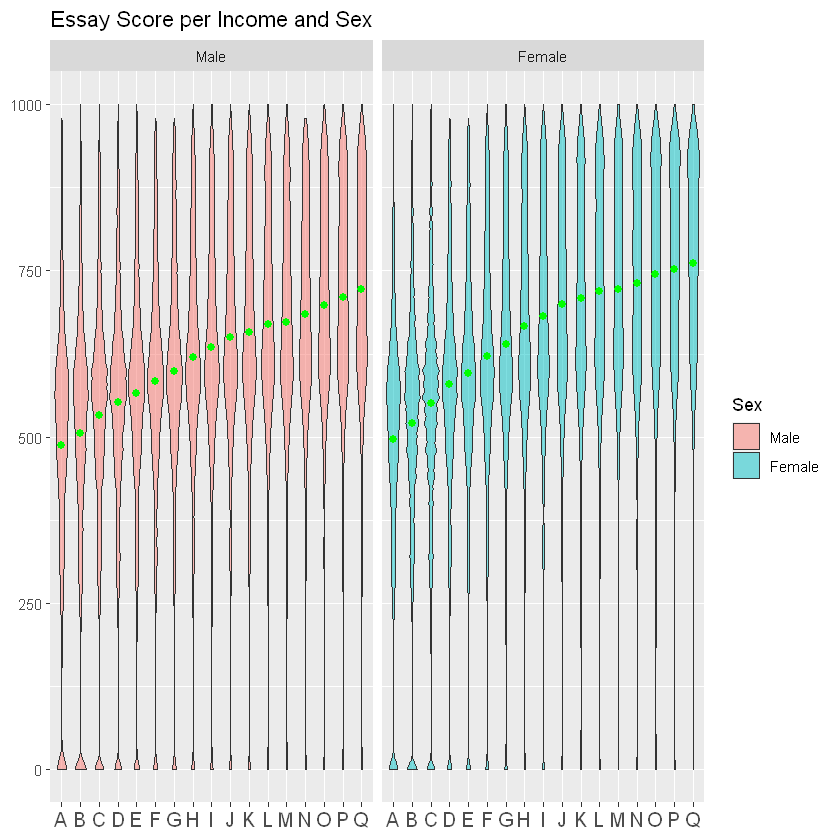

In [35]:
# Relation Essay Score, Income and Sex
df_enem %>%
  ggplot(aes(NU_NOTA_REDACAO, Q006, fill = TP_SEXO)) +
  geom_violin(alpha=.5) +
stat_summary(fun=mean, geom="point", aes(group=TP_SEXO),
             position=position_dodge(.9),
             color="green", size=2,show.legend=F) +
  labs(title = "Essay Score per Income and Sex", x=NULL, y=NULL,fill="Sex") +
facet_wrap(~TP_SEXO) +
theme(axis.text.x = element_text(size = 12)) +
coord_flip()

Warning message:
"Removed 1171416 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_summary)."

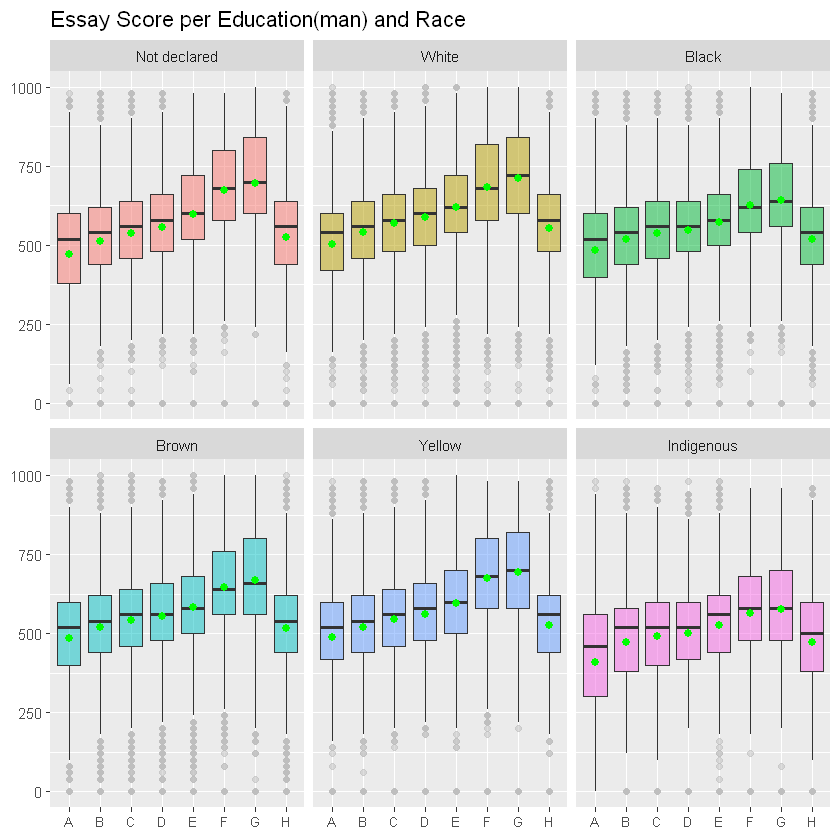

In [36]:
# Relation Score, Education(man) and Race
df_enem %>%
  ggplot(aes(NU_NOTA_REDACAO,Q001,fill=TP_COR_RACA)) +
  geom_boxplot(outlier.colour = "grey",alpha=.5,show.legend=F) +
stat_summary(fun=mean, geom="point", aes(group=TP_COR_RACA),
             position=position_dodge(.9),
             color="green", size=2,show.legend=F) +
  labs(title = "Essay Score per Education(man) and Race", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 8)) +
facet_wrap(~TP_COR_RACA) +
coord_flip()

Warning message:
"Removed 1171416 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_summary)."

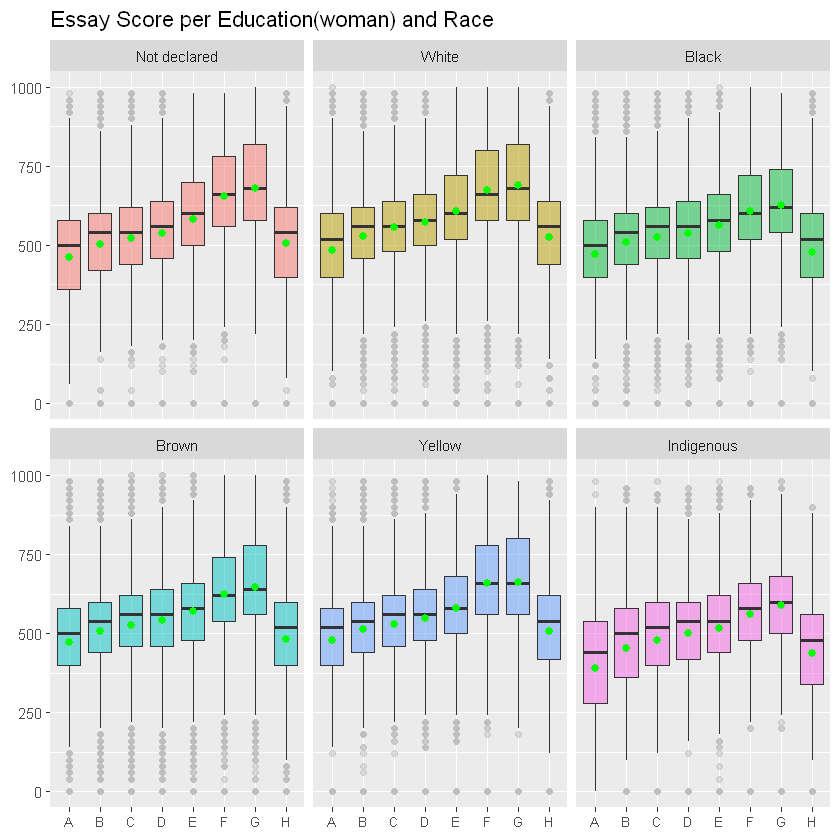

In [37]:
# Relation Score, Education(woman) and Race
df_enem %>%
  ggplot(aes(NU_NOTA_REDACAO,Q002,fill=TP_COR_RACA)) +
  geom_boxplot(outlier.colour = "grey",alpha=.5,show.legend=F) +
stat_summary(fun=mean, geom="point", aes(group=TP_COR_RACA),
             position=position_dodge(.9),
             color="green", size=2,show.legend=F) +
  labs(title = "Essay Score per Education(woman) and Race", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 8)) +
facet_wrap(~TP_COR_RACA) +
coord_flip()

Warning message:
"Removed 1171416 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1171416 rows containing non-finite values (stat_summary)."

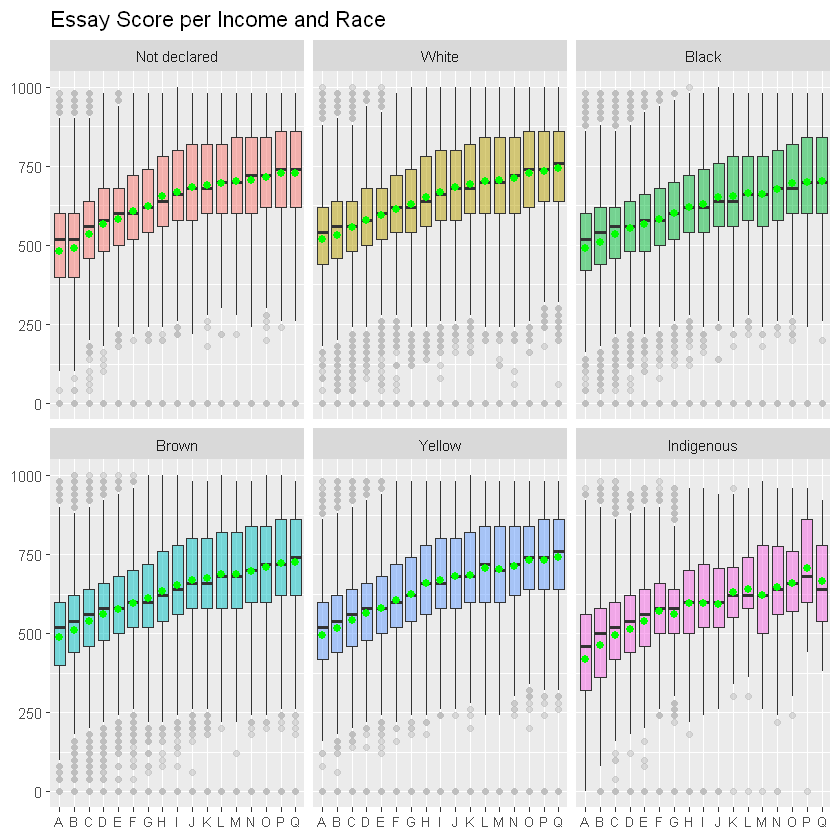

In [38]:
# Relation Score, Income and Race
df_enem %>%
  ggplot(aes(NU_NOTA_REDACAO,Q006,fill=TP_COR_RACA)) +
  geom_boxplot(outlier.colour = "grey",alpha=.5,show.legend=F) +
stat_summary(fun=mean, geom="point", aes(group=TP_COR_RACA),
             position=position_dodge(.9),
             color="green", size=2,show.legend=F) +
  labs(title = "Essay Score per Income and Race", x=NULL, y=NULL) +
theme(axis.text.x = element_text(size = 8)) +
facet_wrap(~TP_COR_RACA) +
coord_flip()

**CONSIDERATIONS**<br>

1. We transformed the numerical variable age (NU_IDADE) into ten categories representing age ranges, such as 15 to 20 years. When we relate it to the scores of the essay, we notice that as the age group increases, the average of the scores declines. With the exception of participants over 90, but it is important to note that we have only 4 observations for this interval. Adding the gender variable, we realized that until the age of 30, the average of female participants is higher than the average of men. In older age groups,, men on average have higher scores in the newsroom. <br>
<br>
2. The self-declared black and brown participants scored an average of 550 points in the essay, a slightly lower when compared to the yellow participants (568 points). The highest averages are of white female participants, who have an average score of 616. Representatives of the indigenous population have a score of 490. It is also important to note that we have only 31,700 self-declared indigenous people at Enem 2019, which represents less than 1% of the total number of participants.<br>
<br>
3. When comparing grade, race and age, we see that white participants in the 15-20 year old age group have on average the best grades, 626 points. The brown and black participants in the age group of 80-90 years have the worst averages, 285 and 310 points respectively. We must emphasize that in this age group we do not have indigenous or yellow participants. So, comparing the 70-80 range, the average brown participants scored 352 points in the essay.<br>
<br>
4. When we analyze the relationship between score and instruction of the person in charge (male and female), we see that the higher their education, the higher the average score of the participant. If we make the cut by race, the self-declared white participants have the highest score, on average 711 for responsible male with complete postgraduate and 690 points for responsible female with the same training. If the participants are black, 643 and 627 points and if they are indigenous 576 and 590, respectively. The same occurs with the relationship between score, income and race. The higher the income, the higher the score, with the exception of self-declared indigenous participants, who have an average of 705 points for the P income bracket and 666 for the Q bracket. <br>
<br>




DIEGO RAMIREZ <br>
daarfarias@hotmail.com<br>
https://github.com/daarfarias